In [3]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - Driver [C:\Users\Admin\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache
C:\Users\Admin\AppData\Local\Temp/ipykernel_10460/2767233116.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [5]:
page_url="https://witcher.fandom.com/wiki/Category:Locations"
driver.get(page_url)

In [21]:
cat = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [23]:
cat[3].text

'Category:The Witcher Adventure Game locations'

In [24]:
cat[3].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:The_Witcher_Adventure_Game_locations'

In [25]:
driver.get(cat[3].get_attribute('href'))

In [27]:
lname=   driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [31]:
lname[2].text

'Rivia (city)'

In [95]:
#full code
#get the url location
page_url="https://witcher.fandom.com/wiki/Category:Locations"
#access the url
driver.get(page_url)
#delay for loading
time.sleep(3)
#get each items by class_name
game_categories = driver.find_elements(By.CLASS_NAME,'category-page__member-link')
#create game list, name+ulr
games = []
#loop for each game name to get game's url
for n_game in game_categories:
    #get link of each game name
    game_url = n_game.get_attribute('href')
    #get the game name
    game_name = n_game.text
    #create dict concat game name+ url
    games.append({'game_name': game_name, "url": game_url})

In [108]:
#create new list for game name+locations
location_list = []
#loop for each game name to get locations
for game in games:
    driver.get(game['url'])
    l_name = driver.find_elements(By.CLASS_NAME,'category-page__member-link')
    #create dict concat game name+ locations
    for l in l_name:
        location_list.append({'game': game['game_name'],'location': l.text})

In [110]:
#make to DF
df=pd.DataFrame(location_list)
df

,game,location
0,Category:Locations in the comics,Black Forest
1,Category:Locations in the comics,Blaviken
2,Category:Locations in the comics,Caed Dhu
3,Category:Locations in the comics,Caingorn (city)
4,Category:Locations in the comics,Cathedral (Creigiau)
...,...,...
1262,Category:Yrrhedes locations,Meskera
1263,Category:Yrrhedes locations,Red Horn Massif
1264,Category:Yrrhedes locations,Sea of Gales
1265,Category:Yrrhedes locations,Vevera


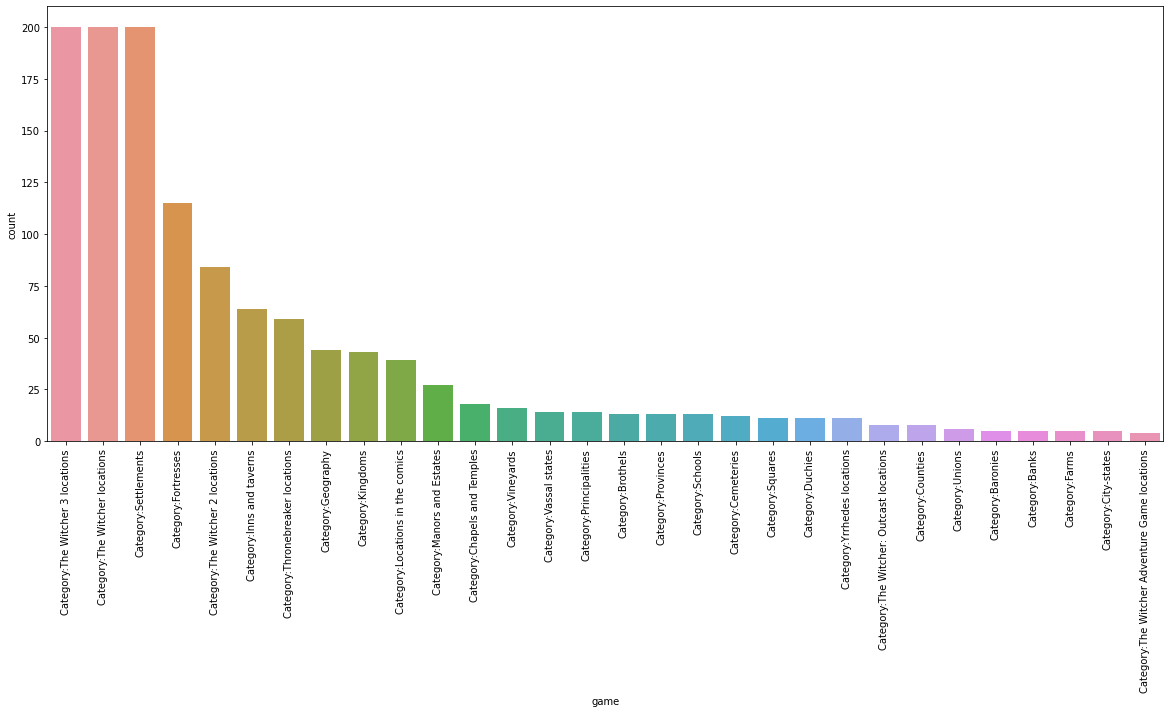

In [113]:
#countplot show number of locations for each game - desc
plt.figure(figsize=(20,8))

ax=sns.countplot(
            data =df, 
            x='game',
            order=df['game'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()